In [1]:
# Dependancies. Uncomment to automatically install.
# %pip install rosbags
# %pip install pandas
# %pip install numpy
# %pip install matplotlib

In [2]:
import utils.rosbags_converter as rc
from utils.seatrac_enums import CST_E
import utils.plotter_utils as p_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/claytonsmith/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Settings
- RELOAD: If true, converts rosbags. Otherwise assumes rosbags are already converted
- ROSBAGS_DIR: Directory where your rosbags are stored. Can contain multiple bags
- SAVES_DIR: The directory to save converted csv files (to save time reloading)
- VERBOSE: Print non-essential values

In [3]:
RELOAD = False
VERBOSE = False
ROSBAGS_DIR = "../../bag"
SAVES_DIR = ROSBAGS_DIR+"/converted_bags/coug2"
ROSMSGS_DIR = "../../cougars-ros2/src"

In [4]:
# Convert Rosbags
if RELOAD:
    print("converting rosbags")
    dataframes = p_utils.get_dataframes(
        rosbags_dir=ROSBAGS_DIR, rosmsgs_dir=ROSMSGS_DIR, csv_dir=SAVES_DIR,
        keywords=None, topics=None,verbose=VERBOSE)
else:
    print("loading dataframes")
    dataframes = rc.load_dataframes(SAVES_DIR, keywords=None, verbose=VERBOSE)
    if len(dataframes)==0:
        raise RuntimeError("Lenth of dataframes is 0. Dataframes may not be loaded")
print("dataframes loaded")

loading dataframes
dataframes loaded


---

In [5]:
# converts ros header.stamp.sec and header.stamp.nanosec into pandas Timestamps objects
# and adds a new column "timestamp" to 
p_utils.insert_timestamps(dataframes)

converted__SO_3.0_multi_cougs-2025-04-18-14-40-49


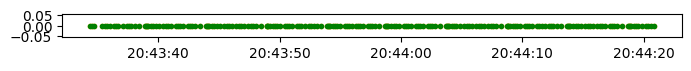

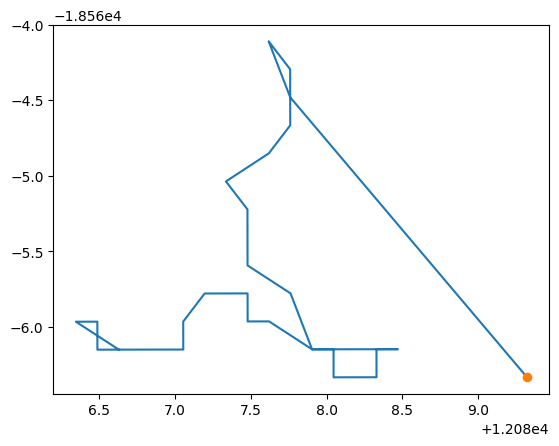

converted__SO_1.0-2025-04-18-14-04-01


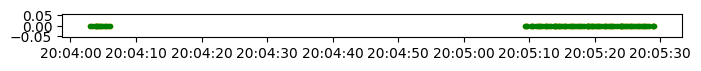

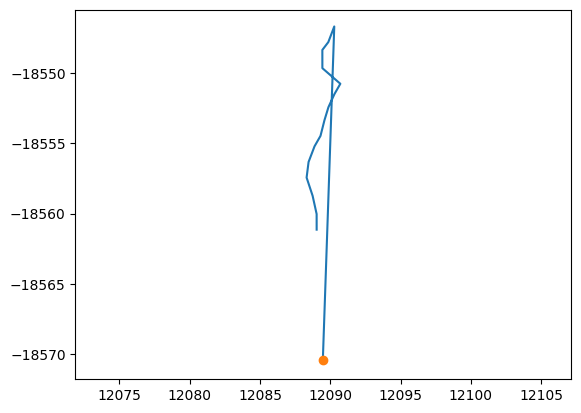

converted__SO_2.0-2025-04-18-14-15-52


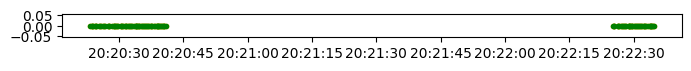

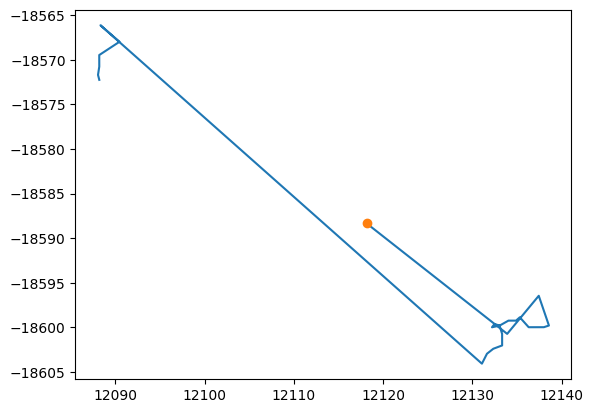

converted__SO_4.0_multi-2025-04-18-15-04-08


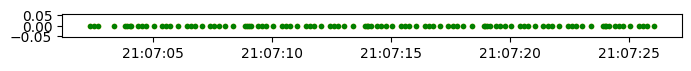

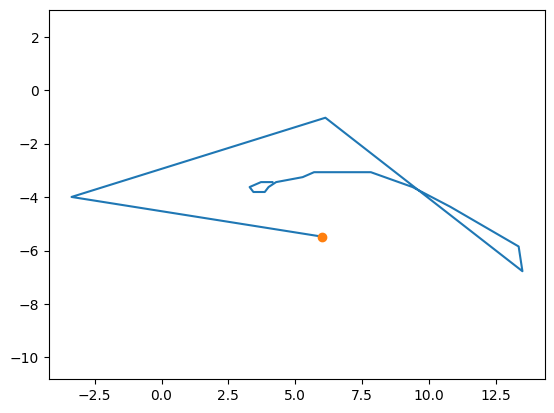

converted__SO_5.2_multi-2025-04-18-16-30-00


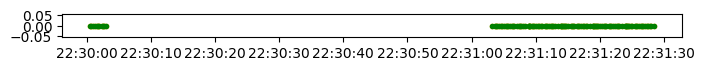

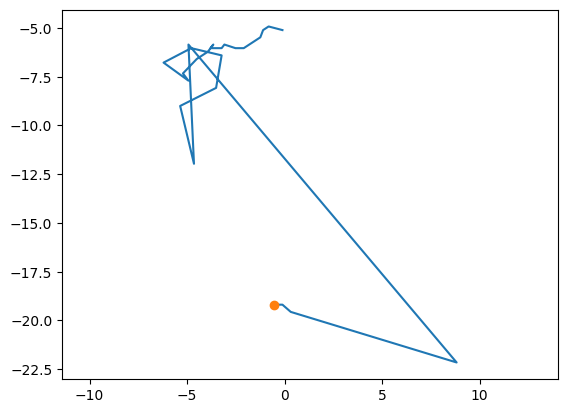

converted__SO_5.0_multi-2025-04-18-15-55-38


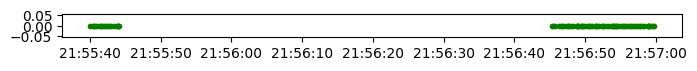

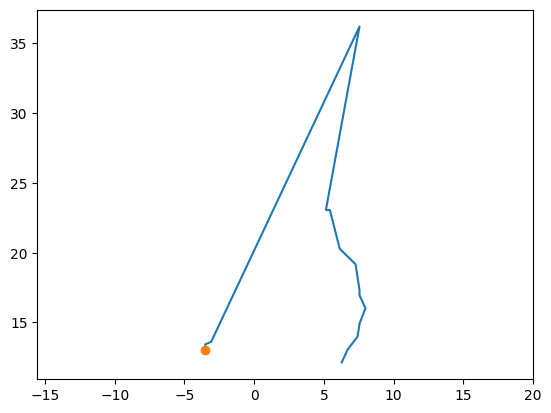

converted__SO_5.1_multi-2025-04-18-16-09-05


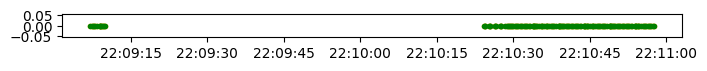

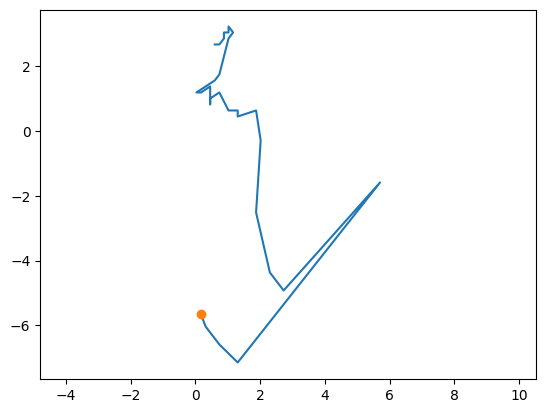

converted__SO_5.5_multi-2025-04-18-16-42-59


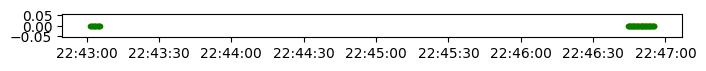

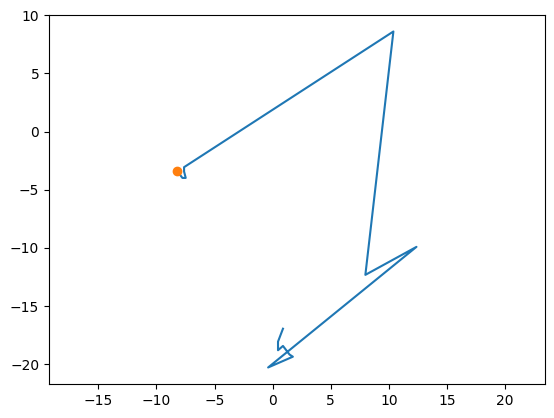

In [6]:
# GPS
for path, bag in dataframes.items():
    print(path)

    # Print GPS timeline. Green = Good fix. Orange = bad fix.
    gps_fix = p_utils.get_topic(bag, "/extended_fix")
    if gps_fix is None: continue
    good_gps_mask = gps_fix["status.status"]!=-1
    good_gps_ts = gps_fix["timestamp"][good_gps_mask]
    ok_gps = gps_fix["timestamp"][gps_fix["latitude"]!=0]
    fig, ax = plt.subplots(figsize=(8, .3))
    ax.plot(ok_gps, [0]*len(ok_gps), 'o', color="orange", markersize='3')
    ax.plot(good_gps_ts, [0]*len(good_gps_ts), 'go', markersize='3')
    plt.show()
    
    gps_odom = p_utils.get_topic(bag, "/gps_odom")
    good_gps_odom = gps_odom[gps_odom["timestamp"].isin(good_gps_ts)]
    if gps_odom is None: continue
    fig, ax = plt.subplots()
    p_utils.plot_pose_w_cov(gps_odom, ax=ax)
    plt.show()

converted__SO_3.0_multi_cougs-2025-04-18-14-40-49


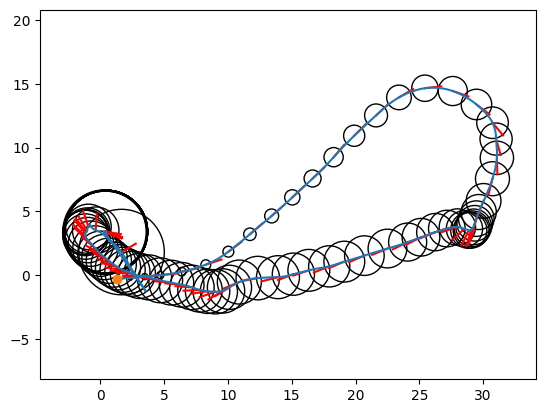

converted__SO_1.0-2025-04-18-14-04-01


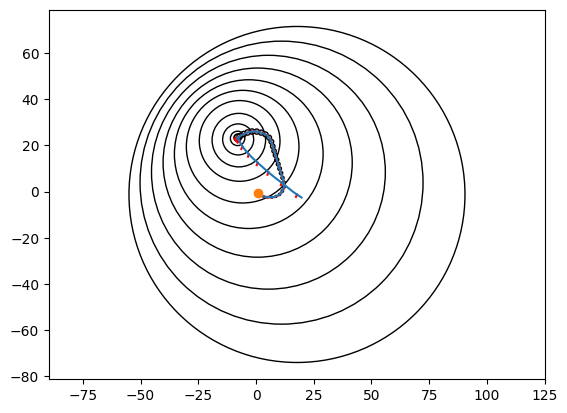

converted__SO_2.0-2025-04-18-14-15-52


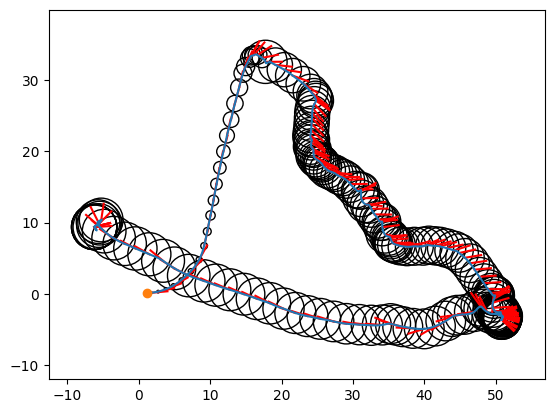

converted__SO_4.0_multi-2025-04-18-15-04-08


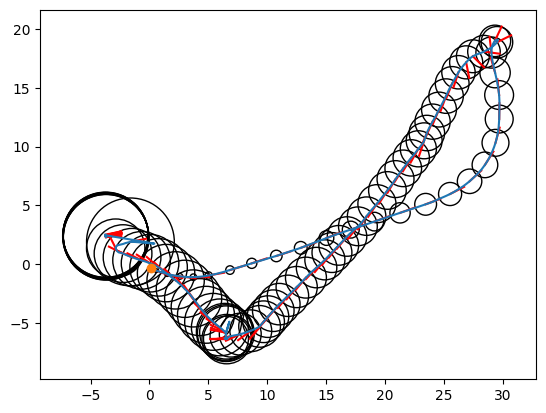

converted__SO_5.2_multi-2025-04-18-16-30-00


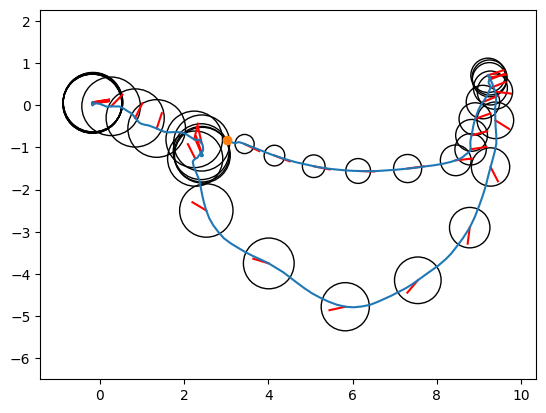

converted__SO_5.0_multi-2025-04-18-15-55-38


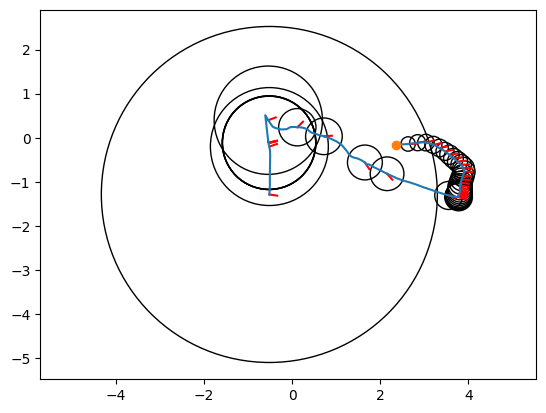

converted__SO_5.1_multi-2025-04-18-16-09-05


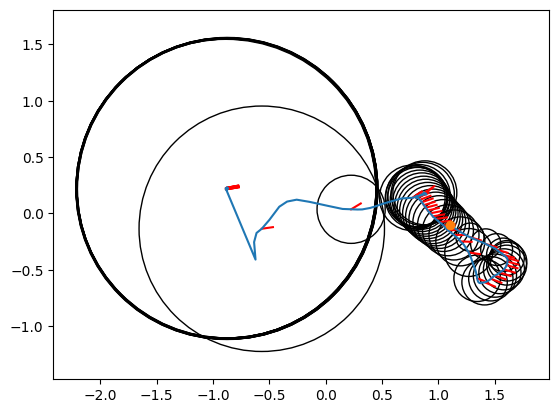

converted__SO_5.5_multi-2025-04-18-16-42-59


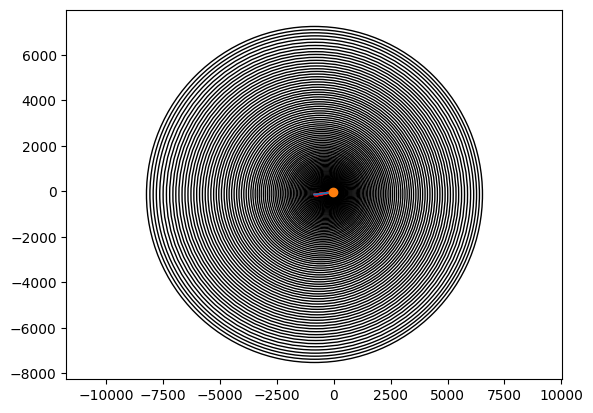

In [7]:

# Plot DVL with covariance

for path, bag in dataframes.items():
    print(path)
    dvl_odom = p_utils.get_topic(bag, "/dvl/dead_reckoning")
    if dvl_odom is None: continue
    fig, ax = plt.subplots()
    ax = p_utils.plot_pose_w_cov(dvl_odom, ax=ax, plot_direction_line=True)
    plt.show()